In [1]:
import pandas as pd
import numpy as np
from torch.autograd import Variable
from skmultilearn.problem_transform import LabelPowerset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

/home/gabiburabia24/.local/lib/python3.5/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
with pd.HDFStore('Y1.h5',  mode='r') as store:
    Y = store.select('Y')

with pd.HDFStore('X1.h5',  mode='r') as store:
    X = store.select('X')

In [3]:
Y.sort_values('cluster', inplace=True)
X.sort_values('cluster_is', inplace=True)

Y.drop('cluster', inplace=True,axis=1)
X.drop(['cluster_is'], inplace=True,axis=1)


In [4]:
X.columns

Index(['A', 'Acidic', 'Aliphatic', 'Aromatic', 'Basic', 'C', 'Charged', 'D',
       'E', 'F', 'G', 'H', 'I', 'InclusionBodiesProbability', 'K', 'L', 'M',
       'N', 'Non-polar', 'P', 'Polar', 'Q', 'R', 'S', 'Small', 'T', 'Tiny',
       'V', 'W', 'Y', 'codone_usage', 'gc_std', 'kaks', 'length', 'loc_type',
       'localization', 'mol_w', 'pi', 'pseb_H1_l_1', 'pseb_H1_l_10',
       'pseb_H1_l_2', 'pseb_H1_l_3', 'pseb_H1_l_4', 'pseb_H1_l_5',
       'pseb_H1_l_6', 'pseb_H1_l_7', 'pseb_H1_l_8', 'pseb_H1_l_9',
       'pseb_H2_l_11', 'pseb_H2_l_12', 'pseb_H2_l_13', 'pseb_H2_l_14',
       'pseb_H2_l_15', 'pseb_H2_l_16', 'pseb_H2_l_17', 'pseb_H2_l_18',
       'pseb_H2_l_19', 'pseb_H2_l_20', 'relative_codone_usage', 'repeated',
       'tmlen'],
      dtype='object')

In [5]:
len(X.columns)

61

In [6]:
X.shape

(2528843, 61)

In [8]:
# for index, data in X.iterrows():
#     pass

# print(index)    

In [9]:
# len(X), X.shape

(2528843, (2528843, 61))

In [10]:
features = np.empty(shape=(X.shape[0], 69))

for index, (_, data) in enumerate(X.iterrows()):
    features[index][0] = data['A']
    features[index][1] = data['Acidic']
    features[index][2] = data['Aliphatic']
    features[index][3] = data['Aromatic']
    features[index][4] = data['Basic']
    features[index][5] = data['C']
    features[index][6] = data['K']
    
    
    
    features[index][7] = data['Charged']
    features[index][8] = data['D']
    features[index][9] = data['E']
    features[index][10] = data['F']
    features[index][11] = data['G']
    features[index][12] = data['H']
    features[index][13] = data['I']
    features[index][14] = data['InclusionBodiesProbability']
    features[index][15] = data['L']
    features[index][16] = data['M']
    features[index][17] = data['N']
    
    features[index][18] = data['Non-polar']
    features[index][19] = data['P']
    features[index][20] = data['Polar']
    features[index][21] = data['Q']
    features[index][22] = data['R']
    
    features[index][23] = data['S']
    features[index][24] = data['Small']
    features[index][25] = data['T']
    
    features[index][26] = data['Tiny']
    features[index][27] = data['V']
    features[index][28] = data['W']
    features[index][29] = data['Y']
    features[index][30] = data['codone_usage']
    features[index][31] = data['gc_std']
    features[index][32] = data['kaks']
    features[index][33] = data['length']
    
    location_type = data['loc_type']
    
    features[index][34] = 0
    features[index][35] = 0
    features[index][36] = 0
    features[index][37] = 0
    features[index][38] = 0
    features[index][39] = 0
    features[index][40] = 0
    features[index][41] = 0
    features[index][42] = 0
    
    if location_type == '0':
        features[index][34] = 1 
    elif location_type == 'SignalP_gram_plus_S':
        features[index][35] = 1 
    elif location_type == 'SignalP_gram_minus_S':
        features[index][36] = 1 
    elif location_type == 'T4SEpre_bpbAac_T4SE':
        features[index][37] = 1 
    elif location_type == 'hmmsearch_Tat':
        features[index][38] = 1 
    elif location_type == 'T3_MM_T3SS':
        features[index][39] = 1 
    elif location_type == 'SignalP_gram_plus_S':
        features[index][40] = 1 
    elif location_type == 'hmmsearch_T6S':
        features[index][41] = 1 
    elif location_type == 'hmmsearch_T1S':
        features[index][42] = 1 
    else:
        raise Exception(location_type)
    
    
    features[index][43] = data['localization']
    features[index][44] = data['mol_w']
    features[index][45] = data['pi']
    features[index][46] = data['pseb_H1_l_1']
    features[index][47] = data['pseb_H1_l_10']
    features[index][48] = data['pseb_H1_l_2']
    features[index][49] = data['pseb_H1_l_3']
    
    features[index][50] = data['pseb_H1_l_4']
    features[index][51] = data['pseb_H1_l_5']
    features[index][52] = data['pseb_H1_l_6']
    features[index][53] = data['pseb_H1_l_7']
    features[index][54] = data['pseb_H1_l_8']
    features[index][55] = data['pseb_H1_l_9']
    features[index][56] = data['pseb_H2_l_11']
    features[index][57] = data['pseb_H2_l_12']
    features[index][58] = data['pseb_H2_l_13']
    features[index][59] = data['pseb_H2_l_14']
    
    features[index][60] = data['pseb_H2_l_15']
    features[index][61] = data['pseb_H2_l_16']
    features[index][62] = data['pseb_H2_l_17']
    features[index][63] = data['pseb_H2_l_18']
    features[index][64] = data['pseb_H2_l_19']
    features[index][65] = data['pseb_H2_l_20']
    features[index][66] = data['relative_codone_usage']
    features[index][67] = data['repeated']
    features[index][68] = data['tmlen']


In [11]:
np.savetxt("features.txt", features, fmt="%s")

In [4]:
print(1)

1


In [5]:
features = np.loadtxt("features.txt")

In [ ]:
# X.head()

In [6]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scalled_features = scaler.fit_transform(features)
# scalled_features = features

In [3]:
# X['InclusionBodiesProbPos'] = (X['InclusionBodiesProbability']>=0)*X['InclusionBodiesProbability']
# X['InclusionBodiesProbNeg'] = (X['InclusionBodiesProbability']<0)*X['InclusionBodiesProbability']


# def location_type_numeric(x1):
#     if x1 == '0':
#         return 1
#     elif x1 == 'SignalP_gram_plus_S':
#         return 2
#     elif x1 == 'SignalP_gram_minus_S':
#         return 3
#     elif x1 == 'T4SEpre_bpbAac_T4SE':
#         return 4
#     elif x1 == 'hmmsearch_Tat':
#         return 5
#     elif x1 == 'T3_MM_T3SS':
#         return 6
#     elif x1 == 'SignalP_gram_plus_S':
#         return 7
#     elif x1 == 'hmmsearch_T6S':
#         return 8
#     elif x1 == 'hmmsearch_T1S':
#         return 9
#     else:
#         raise Exception(x1)

# X['loc_type_numeric'] = X['loc_type'].apply(location_type_numeric)


In [4]:
# Y.sort_values('cluster', inplace=True)
# X.sort_values('cluster_is', inplace=True)

# Y.drop('cluster', inplace=True,axis=1)
# X.drop(['cluster_is', 'InclusionBodiesProbability', 'loc_type' ], inplace=True,axis=1)



# number_neg_samples / number_pos_samples 

In [7]:
labels_on_sums = Y.sum(axis=0)

In [9]:
# labels_on_sums.sort_values(ascending=False)[

6688

In [10]:
Y.shape

(2528843, 425)

In [8]:
labels_on_sums = labels_on_sums[labels_on_sums >= 1000]

In [9]:
remove_columns = [col for col in Y.columns if col not in labels_on_sums.keys()]

In [10]:
remove_columns[0:4]

['go_9773', 'go_42256', 'go_6003', 'go_19877']

In [11]:
Y.shape[1] - len(remove_columns)

245

In [12]:
Y.drop(remove_columns, inplace=True,axis=1)

In [13]:
used_labels_on_sums = Y.sum(axis=0)
weights = ((Y.shape[0] - used_labels_on_sums) /  used_labels_on_sums).values

In [14]:
weights[0:4], weights[-4:-1]

(array([ 29.34660155,  17.86351634,  13.97792559, 343.38826093]),
 array([1458.22850548, 1128.45198749, 1134.02827648]))

In [20]:
len(weights)

245

In [15]:
Y.shape, scalled_features.shape

((2528843, 245), (2528843, 69))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(scalled_features, Y.values, test_size=0.3)
# X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5)

In [190]:
# lp = LabelPowerset()
# yt = lp.transform(y_train)
# rus = RandomUnderSampler(random_state=42)
# X_res, y_res = rus.fit_resample(X_train, yt)



(758653, 27)

In [15]:
# y_res = lp.inverse_transform(y_res)
# y_res = y_res.todense()
# y_res =np.array(y_res)

# X_res = X_train.values
# y_res = y_train.values

In [18]:

class DatasetLoader(Dataset):

    def __init__(self, x_df, y_df):
        self.x_df = x_df
        self.y_df = y_df


    def __len__(self):
        return len(self.x_df)

    def __getitem__(self, idx):
        x = self.x_df[idx]
        y = self.y_df[idx]

        return x.reshape(-1), y.reshape(-1)



train_dataset_loader = DatasetLoader(X_train, y_train)
train_loader = DataLoader(train_dataset_loader, batch_size=100, shuffle=True, num_workers=0)


test_dataset_loader = DatasetLoader(X_test, y_test)
test_loader = DataLoader(test_dataset_loader, batch_size=100, shuffle=True, num_workers=0)

class GoTermNN(nn.Module):
    def __init__(self, num_classes, num_inputs=69,  dropout_prob=0.3):
        super(GoTermNN, self).__init__()
        self.pipe = nn.Sequential(
            nn.Linear(num_inputs, 200),
            nn.Sigmoid(),
            
            nn.Linear(200, 100),
            nn.Sigmoid(),
            
            nn.Linear(100, num_classes)
        )


    def forward(self, x):
        return self.pipe(x)
    
class GoTermNN2(nn.Module):
    def __init__(self, num_classes, num_inputs=69,  dropout_prob=0.3):
        super(GoTermNN2, self).__init__()
        self.pipe = nn.Sequential(
            nn.Linear(num_inputs, 500),
            nn.Sigmoid(),
            
            nn.Linear(500, 400),
            nn.Sigmoid(),
            
            nn.Linear(400, 300),
            nn.Sigmoid(),
            
            nn.Linear(300, num_classes)
        )


    def forward(self, x):
        return self.pipe(x)

# class GoTermNN(nn.Module):
#     def __init__(self, num_classes, num_inputs=62,  dropout_prob=0.3):
#         super(GoTermNN, self).__init__()
#         self.pipe = nn.Sequential(
#             nn.Linear(num_inputs, 40),
#             nn.Tanh(),
            
#             nn.Linear(40, 30),
#             nn.Tanh(),
            
#             nn.Linear(30, 20),
            
#             nn.Tanh(),

#             nn.Linear(20, num_classes)
#         )


#     def forward(self, x):
#         return self.pipe(x)

In [19]:
def train(model, device, train_loader, optimizer, epoch, writer, criterion):
    model.train()
    running_loss = 0.0
    running_correct = 0.0
    calc_count = 0.0
    loss1 = 0.1

    per_label_expected = None
    per_label_predicted = None

    for x, (images, labels) in enumerate(train_loader):

        if per_label_expected is None:
            per_label_expected=[]
            per_label_predicted = []

            for i in range(labels.shape[0]):
                per_label_expected.append([])
                per_label_predicted.append([])


        images = images.float().to(device)
        labels = labels.float().to(device)
        optimizer.zero_grad()

        images = Variable(images)
        labels = Variable(labels)

        output = model(images)
        calc_count += output.data.shape[0]
        _, pred = torch.max(output.data, 1)
        loss = criterion(output, labels)

        current_loss = loss.item()
        running_loss += current_loss

        loss1 += current_loss

        if x > 0 and  x %10000 == 0:
            print('train loss {0}'.format(current_loss))

        loss.backward()
        optimizer.step()
        
    return round(running_loss / calc_count, 4)


def test(model, device, test_loader, epoch, writer, criterion):
    model.eval()
    running_correct = 0.0
    running_loss = 0.0
    calc_count = 0.0

    per_label_expected = None
    per_label_predicted = None
    with torch.no_grad():
        for images, labels in test_loader:

            if per_label_expected is None:
                per_label_expected = []
                per_label_predicted = []

                for i in range(labels.shape[0]):
                    per_label_expected.append([])
                    per_label_predicted.append([])

            images = images.float().to(device)
            labels = labels.float().to(device)

            images = Variable(images)
            labels = Variable(labels)
            outputs = model(images)


            #_, pred = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)
            calc_count += outputs.data.shape[0]
            running_loss += loss.item()
            
    print('validation loss {0}'.format(running_loss/calc_count))
    
    return running_loss/calc_count

In [20]:
use_cuda = torch.cuda.is_available()
use_cuda

True

In [21]:
device = torch.device("cuda" if use_cuda else "cpu")

In [76]:
from datetime import datetime

use_cuda = torch.cuda.is_available()

torch.manual_seed(999)

if use_cuda:
    torch.cuda.manual_seed(999)
    torch.cuda.manual_seed_all(999)

print('use_cuda = {}'.format(use_cuda))


weights_trensor = torch.tensor(weights).float() #.to(device)
criterion = torch.nn.BCEWithLogitsLoss(pos_weight = weights_trensor).to(device)

torch.manual_seed(999)
now = datetime.now()

#model = GoTermNN(y_train.shape[1]).to(device)
model = GoTermNN2(y_train.shape[1]).to(device)


optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


for epoch in range(100):
    print('epoch={}'.format(epoch))
    train_loss = train(model, device, train_loader, optimizer, epoch, None, criterion)
    #test_loss = test(model, device, test_loader, epoch, None, criterion)


use_cuda = True
epoch=0
train loss 0.620721161365509
epoch=1
train loss 0.7164129614830017
epoch=2
train loss 0.5140013098716736
epoch=3
train loss 0.6842884421348572
epoch=4
train loss 0.35757437348365784
epoch=5
train loss 0.590869665145874
epoch=6
train loss 0.48750895261764526
epoch=7
train loss 0.5573505163192749
epoch=8
train loss 0.7100915908813477
epoch=9
train loss 0.7810368537902832
epoch=10
train loss 0.4189562201499939
epoch=11
train loss 0.5703253149986267
epoch=12
train loss 0.6032425761222839
epoch=13
train loss 0.3989981710910797
epoch=14
train loss 0.4227091073989868
epoch=15
train loss 0.4263768494129181
epoch=16
train loss 1.0190343856811523
epoch=17
train loss 0.55959552526474
epoch=18
train loss 0.4517976939678192
epoch=19
train loss 0.7039374113082886
epoch=20
train loss 0.7372170090675354
epoch=21
train loss 0.5937597155570984
epoch=22
train loss 0.5225681066513062
epoch=23
train loss 0.6085909605026245
epoch=24
train loss 0.32976171374320984
epoch=25
train loss 

In [22]:
from datetime import datetime

def trainCycle(model, optimizer, num_of_epochs):
    
    torch.manual_seed(999)

    if use_cuda:
        torch.cuda.manual_seed(999)
        torch.cuda.manual_seed_all(999)

    print('use_cuda = {}'.format(use_cuda))
    device = torch.device("cuda" if use_cuda else "cpu")

    weights_trensor = torch.tensor(weights).float() #.to(device)
    criterion = torch.nn.BCEWithLogitsLoss(pos_weight = weights_trensor).to(device)

    torch.manual_seed(999)
    now = datetime.now()

    #model = GoTermNN(y_train.shape[1]).to(device)
    #model = GoTermNN2(y_train.shape[1]).to(device)


    #optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    #optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


    for epoch in range(num_of_epochs):
        print('epoch={}'.format(epoch))
        train_loss = train(model, device, train_loader, optimizer, epoch, None, criterion)
        #test_loss = test(model, device, test_loader, epoch, None, criterion)


In [23]:
model = GoTermNN2(y_train.shape[1]).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
trainCycle(model,optimizer , 20)

use_cuda = True
epoch=0
train loss 0.2455453872680664
epoch=1
train loss 0.1687076985836029
epoch=2
train loss 0.12218335270881653
epoch=3
train loss 0.0780547559261322
epoch=4
train loss 0.08905154466629028
epoch=5
train loss 0.06795430928468704
epoch=6
train loss 0.06929603219032288
epoch=7
train loss 0.05796745792031288
epoch=8
train loss 0.07774253189563751
epoch=9
train loss 0.045303355902433395
epoch=10
train loss 0.058212827891111374
epoch=11
train loss 0.06949786841869354
epoch=12
train loss 0.06604993343353271
epoch=13
train loss 0.12763074040412903
epoch=14
train loss 0.09772027283906937
epoch=15
train loss 0.11091586947441101
epoch=16
train loss 0.1741185039281845
epoch=17
train loss 0.07061723619699478


KeyboardInterrupt: 

In [24]:
torch.save(model.state_dict(), 'GoTermNN21000_all_labels')

In [22]:
model = GoTermNN2(y_train.shape[1]).to(device)
model.load_state_dict(torch.load('GoTermNN21000_1'))
model.eval()


GoTermNN2(
  (pipe): Sequential(
    (0): Linear(in_features=69, out_features=500, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=500, out_features=400, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=400, out_features=300, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=300, out_features=245, bias=True)
  )
)

In [32]:
!ls

chaiclassifier.ipynb				    GoTermNN21000
cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb  multilabelanalysis.ipynb
evo.zip						    NN.ipynb
features.txt					    X1.h5
GoTermNN2					    Y1.h5


In [105]:
model.eval()
with torch.no_grad():
    for  index, (images, labels) in enumerate(test_loader):
        images = images.float().to(device)
        labels = labels.float().to(device)
        images = Variable(images)
        labels = Variable(labels)
        outputs = model(images)
        probs = torch.sigmoid(outputs)
        #print(probs.shape)
        
        #for feature in probs.shape[1]:
        
        if index > 5:
            break

In [96]:
def calcStat(model, threshold, label_index, loader):
    all_labels = []
    all_predictions = []
    all_scores = []
    for  index, (images, labels) in enumerate(loader):
        images = images.float().to(device)
        labels = labels.float().to(device)
        images = Variable(images)
        labels = Variable(labels)
        outputs = model(images)
        probs = torch.sigmoid(outputs)
        my_labels = labels[:, label_index]
        my_probs = probs[:, label_index]
        
        probs = probs.cpu().numpy()
        
        
        all_scores.extend(probs[:, label_index].tolist())
        results = np.zeros(shape=probs[:, label_index].shape)
        results[np.where(probs[:, label_index] >= threshold)] = 1
        all_predictions.extend(results.tolist())
        
        all_labels.extend(labels[:,label_index].tolist())
        
    return all_labels, all_predictions,all_scores

In [34]:
def calcStat2(model, threshold, loader, columns, label_index):
    all_labels = []
    all_predictions = []
    all_scores = []
    
    probs1 =[]
    labels1 = []
    
    for  index, (images, labels) in enumerate(loader):
        
#         if index % 1000 == 0:
#             print(index)
        
        images = images.float().to(device)
        labels = labels.float().to(device)
        images = Variable(images)
        labels = Variable(labels)
        outputs = model(images)
        probs = torch.sigmoid(outputs)
        probs = probs.cpu().numpy()
        
        #for label_index, col in enumerate(columns):
            
        labels1.extend(labels[:, label_index].tolist())
        probs1.extend(probs[:, label_index].tolist())
            
#         col_to_prob[col].append(my_probs)
#         col_to_label[col].append(my_labels)
        
#         
        
        
#         all_scores.extend(probs[:, label_index].tolist())
#         results = np.zeros(shape=probs[:, label_index].shape)
#         results[np.where(probs[:, label_index] >= threshold)] = 1
#         all_predictions.extend(results.tolist())
        
#         all_labels.extend(labels[:,label_index].tolist())
    
    return probs1,labels1
    #return all_labels, all_predictions,all_scores

In [40]:
def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]
    
    
    
    optimal_idx = np.argmin(np.abs(tpr - fpr)) 
    optimal_threshold = thresholds[optimal_idx]

    print('t1={0} ||| t2={1}'.format(optimal_threshold, roc_t['threshold']))
    return list(roc_t['threshold']) 



In [87]:
train_dataset_loader2 = DatasetLoader(X_train, y_train)
train_loader2 = DataLoader(train_dataset_loader2, batch_size=500, shuffle=True, num_workers=0)
from sklearn.metrics import roc_curve, f1_score, accuracy_score
f1_thre = []
with torch.no_grad():
    model.eval()
    for label_index in range(Y.shape[1]):
        label_index = 2
        print('label = {0}'.format(label_index))
        
        label = Y.columns.tolist()[label_index]
        col_to_prob, col_to_label = calcStat2(model, 0.5, train_loader2, Y.columns.tolist(), label_index)
        
        
        f1_score(col_to_label, curent_predictions)
        
        opt1 = Find_Optimal_Cutoff(col_to_label, col_to_prob)
        
        print('opt = {0}'.format(opt1))
        
        f1_thre.append((label, opt1))
        
        
#         fpr, tpr, thresholds = roc_curve(col_to_label, col_to_prob, pos_label=1,drop_intermediate=True)
#         prev = None
#         accuracy_scores = []
#         f1_thre = []
#         print(len(thresholds))
#         for index, thresh in enumerate(thresholds):

#             if index %1000 == 0:
#                 print(index)

#             if prev is not None:
#                 if abs(prev - thresh ) <= 0.01:
#                     accuracy_scores.append(-1)
#                     continue 

#             accuracy_scores.append(f1_score(col_to_label,  [1 if m > thresh else 0 for m in col_to_prob]))

#             prev = thresh
#         accuracies = np.array(accuracy_scores)
#         max_accuracy = accuracies.max() 
#         max_accuracy_threshold =  thresholds[accuracies.argmax()]
#         index = accuracies.argmax()
#         f1_thre.append((label, accuracies[index], thresholds[index]))

#         print((label, accuracies[index], thresholds[index]))
    

label = 2


/home/gabiburabia24/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


t1=2.0 ||| t2=60931    0.476205
Name: threshold, dtype: float64
opt = [0.47620466351509094]
label = 2


KeyboardInterrupt: 

In [46]:
import json 
# x = json.dumps(f1_thre)
# obj = open('thresholds.txt', 'wb')
# obj.write(x)
# obj.close()

import json
with open('thresholds.json', 'w') as outfile:
    json.dump(f1_thre, outfile)

In [52]:
go_term_threhold = {p[0]: p[1] for p in f1_thre}

In [65]:
thresh,threshold[0]

(0.0, 0.5293810367584229)

In [58]:
go_term_threhold


{'go_10124': [0.6160830855369568],
 'go_10125': [0.5106567740440369],
 'go_10133': [0.6203318238258362],
 'go_105': [0.5293810367584229],
 'go_10501': [0.4540943205356598],
 'go_1407': [0.6428552865982056],
 'go_1514': [0.7291839718818665],
 'go_15628': [0.6988471746444702],
 'go_15671': [0.6800072193145752],
 'go_15694': [0.8543277382850647],
 'go_15700': [0.7183036208152771],
 'go_15703': [0.6315870881080627],
 'go_15707': [0.7267354130744934],
 'go_15734': [0.7814751267433167],
 'go_15753': [0.6684572696685791],
 'go_15756': [0.7203608751296997],
 'go_15757': [0.6328644156455994],
 'go_15768': [0.6038869023323059],
 'go_15794': [0.6414404511451721],
 'go_15796': [0.031077101826667786],
 'go_15871': [0.4894276559352875],
 'go_15889': [0.7382705807685852],
 'go_15941': [0.5093042254447937],
 'go_15974': [0.1760285347700119],
 'go_15976': [0.6299612522125244],
 'go_15979': [0.6327002644538879],
 'go_15990': [0.7340695858001709],
 'go_15991': [0.5050241351127625],
 'go_16036': [0.867459

In [69]:
labels_on_sums1 = Y.sum(axis=0)

In [78]:
labels_on_sums1[0:3]

go_9401     168838
go_45454    134060
go_105       83332
dtype: int64

In [73]:

labels_on_sums1.sort_values(ascending=False, inplace=True)

In [77]:
tt =1
for x in labels_on_sums1.items():
    print(x)
    tt += 1
    if tt > 3:
        break

('go_9401', 168838)
('go_45454', 134060)
('go_105', 83332)


In [25]:
train_dataset_loader3 = DatasetLoader(X_train, y_train)
train_loader3 = DataLoader(train_dataset_loader3, batch_size=800, shuffle=True, num_workers=0)
all_probs = []
all_labels1 = []
with torch.no_grad():
    for  index, (images, labels) in enumerate(train_loader3):
        images = images.float().to(device)
        labels = labels.float().to(device)
        images = Variable(images)
        labels = Variable(labels)
        outputs = model(images)
        probs = torch.sigmoid(outputs)
        probs = probs.cpu().numpy()

        all_probs.append(probs)
        #labels[:, label_index].tolist()
        all_labels1.append(labels)
    

In [26]:
len(all_labels1), len(Y.columns.tolist())

(2213, 245)

In [27]:
from sklearn.metrics import roc_curve, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc

# test_dataset_loader = DatasetLoader(X_test, y_test)
# test_loader = DataLoader(test_dataset_loader, batch_size=800, shuffle=True, num_workers=0)

# train_dataset_loader2 = DatasetLoader(X_train, y_train)
# train_loader3 = DataLoader(train_dataset_loader2, batch_size=800, shuffle=True, num_workers=0)

all_labels = []
all_predictions = []

label_to_threshold = {}

with torch.no_grad():
    for label_index, column in enumerate(Y.columns):
        
    #for column, _ in labels_on_sums1.items():
        
        label_index = Y.columns.tolist().index(column)
        print(label_index)
        threshold = 0.4 #go_term_threhold[column][0]
        current_labels = []
        curent_predictions =[]
        
        curent_predictions1 =[]
        curent_predictions2 =[]
        curent_predictions3 =[]
        curent_predictions4 =[]
        curent_predictions5 =[]
        pred_probs = []
#         for  index, (images, labels) in enumerate(train_loader3):
#             images = images.float().to(device)
#             labels = labels.float().to(device)
#             images = Variable(images)
#             labels = Variable(labels)
#             outputs = model(images)
#             probs = torch.sigmoid(outputs)
#             probs = probs.cpu().numpy()
            
        for ind1, labels in enumerate(all_labels1):
            probs = all_probs[ind1]
                
            pred_probs.extend(probs[:, label_index].tolist())

#             all_labels.extend(labels[:, label_index].tolist())
            current_labels.extend(labels[:, label_index].tolist())
        

        
            predictions = [1 if m > threshold else 0 for m in probs[:, label_index].tolist()]
            curent_predictions.extend(predictions)
            
            
            predictions = [1 if m > 0.5 else 0 for m in probs[:, label_index].tolist()]
            curent_predictions1.extend(predictions)
            predictions = [1 if m > 0.75 else 0 for m in probs[:, label_index].tolist()]
            curent_predictions2.extend(predictions)
            predictions = [1 if m > 0.9 else 0 for m in probs[:, label_index].tolist()]
            curent_predictions3.extend(predictions)


            predictions = [1 if m > 0.95 else 0 for m in probs[:, label_index].tolist()]
            curent_predictions4.extend(predictions)

            predictions = [1 if m > 0.98 else 0 for m in probs[:, label_index].tolist()]
            curent_predictions5.extend(predictions)
#             all_predictions.extend(predictions)
        
        res = f1_score(current_labels, curent_predictions)
        res1 = f1_score(current_labels, curent_predictions1)
        res2 = f1_score(current_labels, curent_predictions2)
        res3 = f1_score(current_labels, curent_predictions3)
        res4 = f1_score(current_labels, curent_predictions4)
        res5 = f1_score(current_labels, curent_predictions5)
        
        max_index = np.argmax(np.array([res, res1, res2, res3, res4, res5]))
        
        best_t = [threshold, 0.5, 0.75, 0.9,  0.95, 0.98 ][max_index]
        
        
        
        label_to_threshold[column] = best_t
        
        print('column={0} best thre={1} f1={2} f11={3} f12={4} f13={5} f14={6} f15={7} max_index = {8} '
              .format(column, best_t, res,res1, res2, res3, res4, res5, max_index))
        

        print('\n')
    

0
column=go_105 best thre=0.95 f1=0.44708334168286473 f11=0.511468210028752 f12=0.6967883368749496 f13=0.8006922411306605 f14=0.8118651785631312 f15=0.7860983448980206 max_index = 4 


1
column=go_45454 best thre=0.95 f1=0.5278235003644743 f11=0.582707855995365 f12=0.7163487314297574 f13=0.7734410427849784 f14=0.774737207888107 f15=0.7474738582845502 max_index = 4 


2
column=go_9401 best thre=0.9 f1=0.6697157829785616 f11=0.7133668569414637 f12=0.8060323459578735 f13=0.8408949946626049 f14=0.8326428975664969 f15=0.7886319789248954 max_index = 3 


3
column=go_45227 best thre=0.98 f1=0.1904191153727188 f11=0.2246597975996512 f12=0.3379428327036852 f13=0.47351407716371224 f14=0.5572572893303428 f15=0.6184129901960785 max_index = 5 


4
column=go_42128 best thre=0.98 f1=0.2591531262384538 f11=0.2962158183873201 f12=0.4294265502319194 f13=0.597952940287797 f14=0.6971576705860567 f15=0.7657577112203845 max_index = 5 


5
column=go_6189 best thre=0.98 f1=0.3758740747242459 f11=0.43173958421

column=go_1407 best thre=0.98 f1=0.4928767519144632 f11=0.5473027310451315 f12=0.6883915395966552 f13=0.798472101344164 f14=0.8447765841507083 f15=0.8731339172588553 max_index = 5 


45
column=go_6108 best thre=0.98 f1=0.3693691423964527 f11=0.4237725349255116 f12=0.5937107436314587 f13=0.7546184090052244 f14=0.8290300921687115 f15=0.87024463475383 max_index = 5 


46
column=go_43165 best thre=0.98 f1=0.4400554924959011 f11=0.49802552509586223 f12=0.6594910432843852 f13=0.7752814237003129 f14=0.8271858625295386 f15=0.8619330483539666 max_index = 5 


47
column=go_7205 best thre=0.98 f1=0.13697166592170246 f11=0.16023036972283644 f12=0.24155115711316907 f13=0.3551646110208115 f14=0.44468452895419186 f15=0.5385231261932623 max_index = 5 


48
column=go_42450 best thre=0.98 f1=0.3182048798487155 f11=0.365682362330407 f12=0.5214118370011906 f13=0.6824950110013815 f14=0.7727647543880316 f15=0.8486587481649539 max_index = 5 


49
column=go_16539 best thre=0.98 f1=0.041316482689412945 f11=0.0

column=go_46355 best thre=0.98 f1=0.13056594666344876 f11=0.14402998393717653 f12=0.18572106261859583 f13=0.24510830179563578 f14=0.29930866205774703 f15=0.37431192660550455 max_index = 5 


89
column=go_42619 best thre=0.98 f1=0.32372062010335056 f11=0.3751358063014124 f12=0.5299469718113313 f13=0.6711655541700287 f14=0.7563438852584231 f15=0.828955164921983 max_index = 5 


90
column=go_32049 best thre=0.98 f1=0.5493084995482661 f11=0.5981202152656713 f12=0.7259279804003143 f13=0.8257378356819995 f14=0.8747797419428182 f15=0.9128470758296693 max_index = 5 


91
column=go_6799 best thre=0.98 f1=0.397397476340694 f11=0.425433037600338 f12=0.5088289019687436 f13=0.5965457479232653 f14=0.6607368071689347 f15=0.7333184888295108 max_index = 5 


92
column=go_30388 best thre=0.98 f1=0.40149666503985676 f11=0.4411659513590844 f12=0.5632802657198488 f13=0.692329465043872 f14=0.7728068778856869 f15=0.8457993619283942 max_index = 5 


93
column=go_42254 best thre=0.98 f1=0.3524079838857352 f11=

column=go_9229 best thre=0.98 f1=0.11729549441863157 f11=0.1379184529781994 f12=0.216548394176604 f13=0.33454502814258913 f14=0.43869014421161656 f15=0.5645178942760205 max_index = 5 


133
column=go_32968 best thre=0.98 f1=0.31489833455113514 f11=0.3589802678957223 f12=0.512579140286571 f13=0.6707712974364716 f14=0.7614876789332637 f15=0.8352507707346418 max_index = 5 


134
column=go_6229 best thre=0.98 f1=0.352334774821998 f11=0.3946698020772095 f12=0.5310569321729888 f13=0.6744528073362748 f14=0.7585791691751956 f15=0.8329863520703216 max_index = 5 


135
column=go_1680 best thre=0.98 f1=0.2468128505864355 f11=0.2747366661093463 f12=0.3651574803149606 f13=0.48330224441903846 f14=0.5752762936397571 f15=0.6821470036616952 max_index = 5 


136
column=go_19475 best thre=0.98 f1=0.08573403372961017 f11=0.09938749194068343 f12=0.15390138208672016 f13=0.24289230246965962 f14=0.3342546526626129 f15=0.4776937618147448 max_index = 5 


137
column=go_18160 best thre=0.98 f1=0.4425919842312745

column=go_33539 best thre=0.98 f1=0.3443203108736382 f11=0.3876417676965193 f12=0.5280584820468716 f13=0.6762409369771334 f14=0.7682692307692307 f15=0.851608187134503 max_index = 5 


177
column=go_15757 best thre=0.98 f1=0.20871784802670332 f11=0.23016130778391256 f12=0.2920573634859349 f13=0.36464279536412386 f14=0.42653061224489797 f15=0.49266144814090024 max_index = 5 


178
column=go_19516 best thre=0.98 f1=0.4144075102979212 f11=0.44674250258531545 f12=0.5343908786714587 f13=0.6239092495636999 f14=0.6809933142311366 f15=0.7507082152974505 max_index = 5 


179
column=go_42882 best thre=0.98 f1=0.17401677539608576 f11=0.19969133156134783 f12=0.2882635552505147 f13=0.4105745886161316 f14=0.5058035714285715 f15=0.6245467224546722 max_index = 5 


180
column=go_45151 best thre=0.98 f1=0.20610817266678041 f11=0.23610748760761804 f12=0.34198763670946264 f13=0.4848733744010951 f14=0.5930941096817874 f15=0.7086712414223331 max_index = 5 


181
column=go_6122 best thre=0.98 f1=0.5227745664

column=go_45982 best thre=0.98 f1=0.6175410492591109 f11=0.6508975712777191 f12=0.7415080703444954 f13=0.8256782164920763 f14=0.8747503566333809 f15=0.914560770156438 max_index = 5 


220
column=go_1901106 best thre=0.98 f1=0.15953165020124405 f11=0.1772234450150811 f12=0.2388460248238846 f13=0.33360141547370115 f14=0.425280067638977 f15=0.5583358456436538 max_index = 5 


221
column=go_6742 best thre=0.98 f1=0.10943184998600618 f11=0.12005856515373352 f12=0.16087182148417228 f13=0.21191310441485636 f14=0.2534538632099608 f15=0.31793057705063005 max_index = 5 


222
column=go_42122 best thre=0.98 f1=0.10322782826700093 f11=0.11198910081743868 f12=0.14037657805161788 f13=0.1770234409553295 f14=0.21073771589235507 f15=0.26307090039147457 max_index = 5 


223
column=go_9298 best thre=0.98 f1=0.1203996242848604 f11=0.14012230789683597 f12=0.2143152241272464 f13=0.3294839699588145 f14=0.4300703082747431 f15=0.5553776742832193 max_index = 5 


224
column=go_30253 best thre=0.98 f1=0.22885204

In [32]:
import json
with open('label_to_threshold.json', 'w') as outfile:
    json.dump(label_to_threshold, outfile)

In [28]:
test_dataset_loader3 = DatasetLoader(X_test, y_test)
test_loader3 = DataLoader(test_dataset_loader3, batch_size=800, shuffle=True, num_workers=0)
test_all_probs = []
test_all_labels = []
with torch.no_grad():
    for  index, (images, labels) in enumerate(test_loader3):
        images = images.float().to(device)
        labels = labels.float().to(device)
        images = Variable(images)
        labels = Variable(labels)
        outputs = model(images)
        probs = torch.sigmoid(outputs)
        probs = probs.cpu().numpy()

        test_all_probs.append(probs)
        #labels[:, label_index].tolist()
        test_all_labels.append(labels)

#label_to_threshold[column]

In [29]:
from sklearn.metrics import roc_curve, f1_score, accuracy_score,hamming_loss,jaccard_score,\
log_loss, precision_score, recall_score, f1_score

In [50]:
#jaccard_score(current_labels, curent_predictions, average='samples')
# precision_score([[1,1,1],[1,0,1]], [[1,0,1],[1,0,1]], average = 'samples')
# len(current_labels),len( curent_predictions)
# current_labels[0:10],curent_predictions[0:10]

ValueError: multiclass-multioutput is not supported

In [30]:

from sklearn.metrics import roc_curve, auc

# test_dataset_loader = DatasetLoader(X_test, y_test)
# test_loader = DataLoader(test_dataset_loader, batch_size=800, shuffle=True, num_workers=0)

# train_dataset_loader2 = DatasetLoader(X_train, y_train)
# train_loader3 = DataLoader(train_dataset_loader2, batch_size=800, shuffle=True, num_workers=0)

all_test_predictions = []
all_test_labels = []

column_res = {}    
with torch.no_grad():
    for label_index, column in enumerate(Y.columns):
        
    #for column, _ in labels_on_sums1.items():
        
        label_index = Y.columns.tolist().index(column)
        print(label_index)
        threshold = label_to_threshold[column]
  

        curent_predictions = []
        current_labels = []
        current_prob = []
        for ind1, labels in enumerate(test_all_labels):
            probs = test_all_probs[ind1]
                
            #pred_probs.extend(probs[:, label_index].tolist())
            
            
#             all_labels.extend(labels[:, label_index].tolist())
            current_labels.extend(labels[:, label_index].tolist())
        
            all_test_labels.extend(labels[:, label_index].tolist())
        
            predictions = [1 if m > threshold else 0 for m in probs[:, label_index].tolist()]
            
            current_prob.extend(probs[:, label_index].tolist())
            curent_predictions.extend(predictions)
            all_test_predictions.extend(predictions)
           
        

        print("F1 score w: %f" % f1_score(current_labels, curent_predictions, average = 'weighted'))
        

        print('\n')
    

0


1


2


3


4


5


6


7


8


9


10


11


12


13


14


15


16


17


18


19


20


21


22


23


24


25


26


27


28


29


30


31


32


33


34


35


36


37


38


39


40


41


42


43


44


45


46


47


48


49


50


51


52


53


54


55


56


57


58


59


60


61


62


63


64


65


66


67


68


69


70


71


72


73


74


75


76


77


78


79


80


81


82


83


84


85


86


87


88


89


90


91


92


93


94


95


96


97


98


99


100


101


102


103


104


105


106


107


108


109


110


111


112


113


114


115


116


117


118


119


120


121


122


123


124


125


126


127


128


129


130


131


132


133


134


135


136


137


138


139


140


141


142


143


144


145


146


147


148


149


150


151


152


153


154


155


156


157


158


159


160


161


162


163


164


165


166


167


168


169


170


171


172


173


174


175


176


177


178


179


180


181


182


183


184




In [ ]:
len(all_test_labels), len(all_test_predictions)
import json
with open('all_test_labels.json', 'w') as outfile:
    json.dump(all_test_labels, outfile)
    
with open('all_test_predictions.json', 'w') as outfile:
    json.dump(all_test_predictions, outfile)    

In [33]:
        
# print("Accuracy score: %f" % accuracy_score(all_test_labels, all_test_predictions))
# print("Hamming loss: %f" % hamming_loss(all_test_labels, all_test_predictions))
#         #print("Jaccard score: %f" % jaccard_score(current_labels, curent_predictions, average='samples'))
#         #print("Jaccard score w: %f" % jaccard_score(current_labels, curent_predictions, average='weighted'))
# print("Log-loss: %f" % log_loss(all_test_labels, all_test_predictions))
# #         print("Precision score: %f" % precision_score(current_labels, curent_predictions, average = 'samples'))
# print("Precision score w: %f" % precision_score(all_test_labels, all_test_predictions, average = 'weighted'))
# #         print("Recall score: %f" % recall_score(current_labels, curent_predictions, average = 'samples'))
# print("Recall score w: %f" % recall_score(all_test_labels, all_test_predictions, average = 'weighted'))
# #         print("F1 score: %f" % f1_score(current_labels, curent_predictions, average = 'samples'))
print("F1 score w: %f" % f1_score(all_test_labels, all_test_predictions, average = 'weighted'))
        

MemoryError: 

In [36]:
current_labels

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [39]:
#len(col_to_prob), len(col_to_label)
from sklearn.metrics import roc_curve, f1_score, accuracy_score

fpr, tpr, thresholds = roc_curve(col_to_label, col_to_prob, pos_label=1,drop_intermediate=True)
prev = None
accuracy_scores = []
f1_thre = []

print(len(thresholds))
for index, thresh in enumerate(thresholds):
    
    if index %1000 == 0:
        print(index)
        
    if prev is not None:
        if abs(prev - thresh ) <= 0.01:
            accuracy_scores.append(-1)
            continue 
                    
    accuracy_scores.append(f1_score(col_to_label,  [1 if m > thresh else 0 for m in col_to_prob]))
    
    prev = thresh
        
accuracies = np.array(accuracy_scores)
max_accuracy = accuracies.max() 
max_accuracy_threshold =  thresholds[accuracies.argmax()]
index = accuracies.argmax()
f1_thre.append((Y.columns.tolist()[label_index], accuracies[index], thresholds[index]))
    
print((Y.columns.tolist()[label_index], accuracies[index], thresholds[index]))


105606
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
1

In [ ]:
col_to_prob

In [197]:
np.where(np.asarray(all_scores) > 0.9),np.where(np.asarray(all_labels) > 0.9)

((array([   153,    303,    398, ..., 758501, 758519, 758558]),),
 (array([   130,    153,    267, ..., 758501, 758519, 758558]),))

In [45]:
with torch.no_grad():
    model.eval()
    all_labels, all_predictions, all_scores = calcStat(model, 0.8, 3, train_loader)

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

f1_score(all_labels, all_predictions)

0.31197511664074645

In [63]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(all_labels, all_scores, pos_label=1,drop_intermediate=True)
len(thresholds)

22279

(1011537, 245)

'go_105'

In [97]:
from sklearn.metrics import roc_curve, f1_score, accuracy_score

f1_thre = []
with torch.no_grad():
    model.eval()
    
    for label_index in range(y_train.shape[1]):
        print(feature_index)
        print(1)
        all_labels, all_predictions, all_scores = calcStat(model, 0.5, label_index, train_loader)
        print(2)

        fpr, tpr, thresholds = roc_curve(all_labels, all_scores, pos_label=1,drop_intermediate=True)
        print(3)
        accuracy_scores = []

        prev = None
        print(len(thresholds))
        for index, thresh in enumerate(thresholds):
            if prev is not None:
                if abs(prev - thresh ) <= 0.01:
                    accuracy_scores.append(-1)
                    continue 

            accuracy_scores.append(f1_score(all_labels, 
                                                 [1 if m > thresh else 0 for m in all_scores]))
            prev = thresh
        print(4)
        accuracies = np.array(accuracy_scores)
        max_accuracy = accuracies.max() 
        max_accuracy_threshold =  thresholds[accuracies.argmax()]

        index = accuracies.argmax()
        
        f1_thre.append((Y.columns.tolist()[label_index], accuracies[index], thresholds[index]))
        print((Y.columns.tolist()[label_index], accuracies[index], thresholds[index]))

59
1
2
3
59599


KeyboardInterrupt: 

In [81]:
max_accuracy_threshold

0.7971210479736328

In [56]:
thresholds,false_positive_rate,true_positive_rate

(array([1.99999988e+00, 9.99999881e-01, 9.99997854e-01, ...,
        3.59954199e-39, 2.94180892e-39, 0.00000000e+00]),
 array([0.        , 0.        , 0.        , ..., 0.94782664, 0.94811543,
        1.        ]),
 array([0.00000000e+00, 9.35891437e-05, 5.61534862e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]))

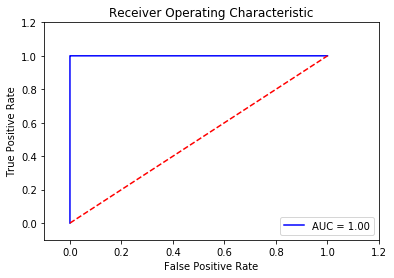

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(all_labels, all_predictions, pos_label=1)
roc_auc = auc(false_positive_rate, true_positive_rate)


plt.title('Receiver Operating Characteristic')

plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [181]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.99999881e-01, ...,
       8.60676956e-39, 2.94174166e-39, 0.00000000e+00])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
all_scores
f1_score(all_labels, all_predictions)

In [180]:
thresholds,false_positive_rate

(array([2.00000000e+00, 1.00000000e+00, 9.99999881e-01, ...,
        8.60676956e-39, 2.94174166e-39, 0.00000000e+00]),
 array([0.        , 0.        , 0.        , ..., 0.99183417, 0.99220764,
        1.        ]))

In [153]:
accuracy_score(all_labels, all_predictions)

0.9757491237759556

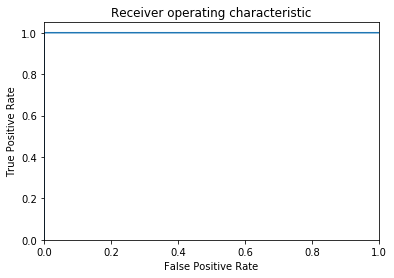

In [160]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(2):
#     fpr[i], tpr[i], _ = roc_curve(all_labels, all_predictions)
#     roc_auc[i] = auc(fpr[i], tpr[i])

fpr, tpr ,_= roc_curve(all_labels, all_scores)

plt.figure()
# plt.plot(fpr[1], tpr[1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [138]:
len(all_predictions)

758653

In [140]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
#accuracy_score(all_labels, all_predictions)
f1_score(all_labels, all_predictions)


0.7022734004739337

In [119]:

# probs = probs.cpu().numpy()

results = np.zeros(shape=probs[:, 5].shape)
results[np.where(probs[:, 5] >= 0.6)] = 1
results,labels[:,5]
# 

(array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0'))

In [107]:
labels[:, 5][[7, 24, 80]]

tensor([1., 1., 1.], device='cuda:0')

labels[:, 5][[7, 24, 80]]

In [108]:
probs[:, 5][[7, 24, 80]]

tensor([0.6646, 0.9965, 0.9969], device='cuda:0')

In [109]:
np.where(probs.cpu().numpy()[:, 5] >= 0.6)

(array([ 7, 18, 24, 59, 61, 80]),)

In [73]:
probs[:, 4][85]


tensor(0.9989, device='cuda:0')

In [103]:
probs.cpu().numpy()[:, 5]

array([1.09679476e-07, 2.90676667e-07, 3.91447611e-05, 2.91655144e-08,
       1.25464634e-04, 4.90657476e-05, 1.32901849e-12, 3.30286234e-08,
       1.69566438e-01, 2.47759605e-03, 1.94958920e-05, 4.36225060e-15,
       7.10347422e-06, 3.10336276e-07, 4.69285505e-12, 6.62128116e-07,
       1.55898991e-08, 1.00924335e-05, 1.75348471e-03, 8.74051638e-03,
       1.51977622e-06, 3.25389031e-08, 9.51959578e-07, 1.66297596e-05,
       1.03913878e-09, 2.36632415e-11, 2.63910799e-04, 5.67465008e-09,
       4.17529522e-09, 1.64859084e-04, 5.49246648e-10, 3.19015512e-13,
       4.75896150e-01, 1.72227337e-05, 1.14775212e-05, 1.04977180e-05,
       1.14273244e-05, 1.70626707e-14, 2.02233716e-12, 1.20797682e-04,
       2.62322303e-10, 8.05840854e-14, 6.63057872e-05, 1.68745589e-06,
       2.28975496e-05, 1.80310258e-06, 1.04832306e-11, 2.95677921e-03,
       6.69398014e-06, 4.13345769e-02, 2.13086295e-07, 1.67253620e-05,
       3.35031981e-03, 1.79383193e-08, 7.44296904e-06, 7.14817205e-10,
      

In [75]:
np.where(probs.cpu().numpy()[:, 3] >= 0.9)

(array([52, 77, 83, 96]),)

tensor(0.4866, device='cuda:0')

In [32]:
probs[:, 12]

tensor([0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840,
        0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840,
        0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840,
        0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840,
        0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840,
        0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840,
        0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840,
        0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840,
        0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840,
        0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840,
        0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840, 0.4840,
        0.4840], device='cuda:0')

(tensor(0.0430, device='cuda:0'), tensor(0.0256, device='cuda:0'))

In [110]:
for feature in range(probs.shape[1]):
    print(probs[:, 5])
    print(labels[:, 5])
    
    break 

tensor([0.0550, 0.0236, 0.0256, 0.0304, 0.0132, 0.0555, 0.0071, 0.0104, 0.0280,
        0.0525, 0.0256, 0.0264, 0.0260, 0.0304, 0.0270, 0.0317, 0.0666, 0.0278,
        0.0091, 0.0278, 0.0306, 0.0254, 0.0029, 0.0238, 0.0287, 0.1074, 0.0277,
        0.0156, 0.0297, 0.0277, 0.0430, 0.0097, 0.0268, 0.0294, 0.0268, 0.0159,
        0.0388, 0.0305, 0.0160, 0.0125, 0.0223, 0.0308, 0.0283, 0.0278, 0.0182,
        0.0286, 0.0275, 0.0269, 0.0300, 0.0020, 0.0554, 0.0076, 0.0279, 0.0260,
        0.0320, 0.0382, 0.0279, 0.0228, 0.0251, 0.0290, 0.0303, 0.0226, 0.0314,
        0.0286, 0.0256, 0.0281, 0.0133, 0.0081, 0.0042, 0.0139, 0.0464, 0.0308,
        0.0265, 0.0310, 0.0228, 0.0182, 0.0375, 0.0188, 0.0466, 0.0239, 0.0280,
        0.0282, 0.0787, 0.0279, 0.0285, 0.0215, 0.0254, 0.0096, 0.0250, 0.0240,
        0.0595, 0.0332, 0.0151, 0.0266, 0.0230, 0.0101, 0.0197, 0.0380, 0.0290,
        0.0260], device='cuda:0')
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
      

In [ ]:
def accuracy(model, device, test_loader, epoch, writer, criterion):
    model.eval()
    running_correct = 0.0
    running_loss = 0.0
    calc_count = 0.0

    per_label_expected = None
    per_label_predicted = None
    with torch.no_grad():
        for images, labels in test_loader:
            
            images = images.float().to(device)
            labels = labels.float().to(device)

            images = Variable(images)
            labels = Variable(labels)
            outputs = model(images)
            probs = torch.sigmoid(outputs)
            
            

            #_, pred = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)
            calc_count += outputs.data.shape[0]
            running_loss += loss.item()
            
    print('validation loss {0}'.format(running_loss/calc_count))
    
    return running_loss/calc_count